## Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [2]:
df=pd.read_csv('Height-Weight.csv')
df.head() 

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

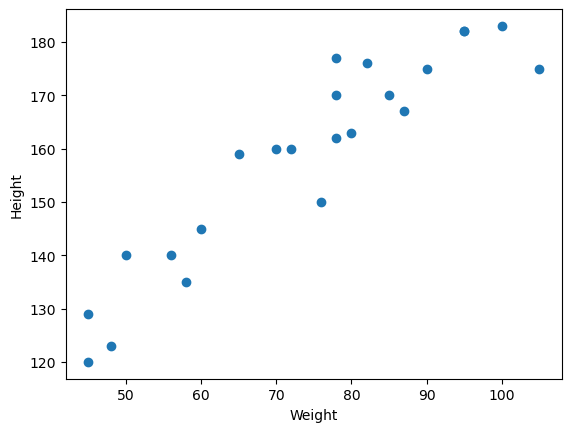

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [5]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [6]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [7]:
## Divvide Our Dataset Into Independent And Dependent Features 
X=df[['Weight']] ## Idnependent Feature
y=df['Height'] ## Dependent Features 

In [8]:
X.shape, y.shape

((23, 1), (23,))

In [9]:
from sklearn.model_selection import train_test_split 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=40)  

In [11]:
X_train.shape, X_test.shape , 

((18, 1), (5, 1))

In [12]:
y_train.shape,y_test.shape 

((18,), (5,))

In [13]:
from sklearn.preprocessing import StandardScaler 

In [14]:
scaler=StandardScaler() 

In [15]:
X_train=scaler.fit_transform(X_train)

In [16]:
X_test=scaler.transform(X_test)

In [17]:
X_test 

array([[-0.06452085],
       [-0.43404932],
       [ 1.14964416],
       [ 0.25221785],
       [-0.17010041]])

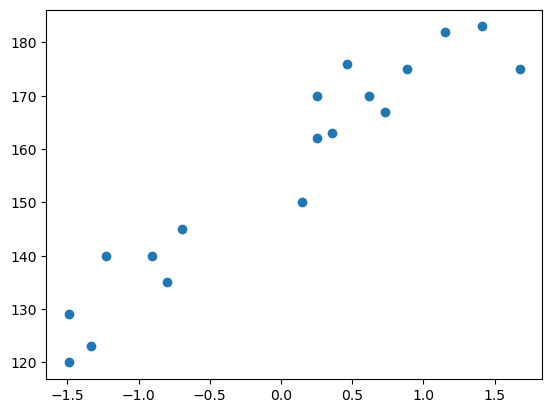

In [18]:
plt.scatter(X_train,y_train)

In [19]:
## Model Training

from sklearn.linear_model import LinearRegression

In [20]:
regressor=LinearRegression() 

In [21]:
## Training The Train Data 
regressor.fit(X_train,y_train)

LinearRegression()

In [22]:
regressor.intercept_

155.83333333333334

In [23]:
regressor.coef_

array([19.2174361])

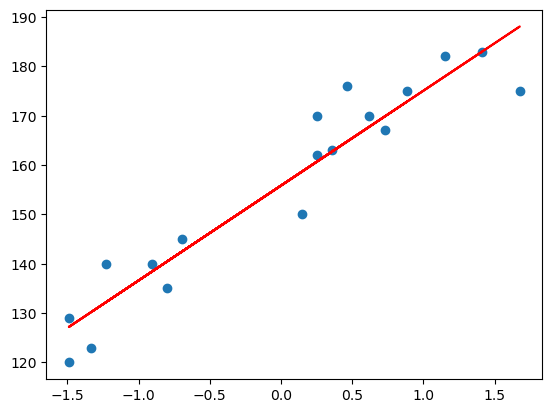

In [24]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### Prediction Of Train Data 
1. Predicted Height Output = Intercept + Coef_(Weights) 
2. Y_Pred_Train = 157.5 + 17.03(X_Train) 
          
### Prediction Of Test Data 
1. Predicted Height Output = Intercept + Coef_(Weights)
2. Y_Pred_Test = 157.5 + 17.03 (X_Test) 

In [26]:
## Prediction For Test Data 
y_pred_test= regressor.predict(X_test)

In [27]:
y_pred_test

array([154.59340811, 147.49201817, 177.92654648, 160.68031377,
       152.56443955])

In [28]:
y_test

22    160
17    159
11    182
15    177
4     160
Name: Height, dtype: int64

## Performance Metrics MAE,MSE,RMSE 

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [30]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse) 

99.9755246528458
8.94865478566021
9.998776157752799


##  Accuracy Of The Model R Squared And Adjusted R Ssquared 
## R Square  
Formula 

**R^2 = 1 - SSR/SST**


- R^2	=	Accuracy Of The Model
- SSR	=	Sum Of Squares Of Residuals
- SST	=	Total Sum Of Squares 

In [31]:
from sklearn.metrics import r2_score

In [32]:
score=r2_score(y_test,y_pred_test)
score

-0.030250666249441505

## Adjusted R Square 
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]** 

Where:

- R2: The R2 Of The Model  
- n:  The Number Of Observations  
- k:  The Number Of Predictor Variables  

In [34]:
# Display Adjusted R Squared 

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-0.3736675549992554

In [35]:
scaler , regressor 

(StandardScaler(), LinearRegression())